In [100]:
#Import neccessary packaging
import random
import os
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

#Deep Learning Packages
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Importing this Data

In [2]:
def load_data():
    data = {}
    
    for subject in range(1, 110):
        data[subject] = {}
        
        for run in range(1, 15):
            edf_path = f'files/S{subject:03d}/S{subject:03d}R{run:02d}.edf'
            
            #Load raw EEG data using MNE
            raw = mne.io.read_raw_edf(edf_path, preload = True)
            
            data[subject][run] = raw
            
    return data

all_data = load_data()

Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S001/S001R04.edf.

Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S003/S003R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S003/S003R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S003/S003R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Docum

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S005/S005R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S005/S005R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S005/S005R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extr

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S007/S007R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S007/S007R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S007/S007R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S009/S009R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S009/S009R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S009/S009R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S011/S011R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S011/S011R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S011/S011R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S013/S013R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S013/S013R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S013/S013R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S015/S015R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S015/S015R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S015/S015R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S017/S017R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S017/S017R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S017/S017R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S019/S019R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S019/S019R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S019/S019R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S021/S021R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S021/S021R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S021/S021R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S023/S023R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S023/S023R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S023/S023R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S025/S025R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S025/S025R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S026/S026R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extr

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S027/S027R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S028/S028R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S028/S028R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extra

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S030/S030R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S030/S030R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S030/S030R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Extra

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S032/S032R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S032/S032R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S032/S032R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extra

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S034/S034R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S034/S034R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S034/S034R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extr

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S036/S036R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S036/S036R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S036/S036R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S038/S038R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S038/S038R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S038/S038R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S040/S040R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S040/S040R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S040/S040R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S042/S042R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S042/S042R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S042/S042R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S044/S044R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S044/S044R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S044/S044R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S046/S046R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S046/S046R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S046/S046R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S048/S048R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S048/S048R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S048/S048R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S050/S050R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S050/S050R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S050/S050R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S052/S052R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S052/S052R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S052/S052R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S054/S054R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S054/S054R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S055/S055R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extr

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S056/S056R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S057/S057R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S057/S057R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extra

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S059/S059R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S059/S059R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S059/S059R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extra

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S061/S061R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S061/S061R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S061/S061R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extra

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S063/S063R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S063/S063R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S063/S063R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extr

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S065/S065R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S065/S065R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S065/S065R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S067/S067R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S067/S067R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S067/S067R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S069/S069R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S069/S069R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S069/S069R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S071/S071R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S071/S071R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S071/S071R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S073/S073R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S073/S073R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S073/S073R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S075/S075R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S075/S075R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S075/S075R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S077/S077R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S077/S077R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S077/S077R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S079/S079R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S079/S079R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S079/S079R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S081/S081R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S081/S081R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S081/S081R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S083/S083R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S083/S083R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S084/S084R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extr

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S085/S085R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S086/S086R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S086/S086R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extra

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S088/S088R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S088/S088R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S088/S088R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15871  =      0.000 ...   123.992 secs...
Extra

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S090/S090R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S090/S090R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S090/S090R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extra

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S092/S092R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15871  =      0.000 ...   123.992 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S092/S092R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15871  =      0.000 ...   123.992 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S092/S092R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15871  =      0.000 ...   123.992 secs...
Extr

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S094/S094R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S094/S094R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S094/S094R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S096/S096R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S096/S096R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S096/S096R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S098/S098R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S098/S098R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S098/S098R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15743  =      0.000 ...   122.992 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S100/S100R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15743  =      0.000 ...   122.992 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S100/S100R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15743  =      0.000 ...   122.992 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S100/S100R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15743  =      0.000 ...   122.992 secs...
Ext

/var/folders/kb/fxsdzvkd3tn7qtds435g0l880000gn/T/ipykernel_73583/1718848310.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(edf_path, preload = True)
/var/folders/kb/fxsdzvkd3tn7qtds435g0l880000gn/T/ipykernel_73583/1718848310.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(edf_path, preload = True)
/var/folders/kb/fxsdzvkd3tn7qtds435g0l880000gn/T/ipykernel_73583/1718848310.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(edf_path, preload = True)
/var/folders/kb/fxsdzvkd3tn7qtds435g0l880000gn/T/ipykernel_73583/1718848310.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(edf_path, preload = True)
/var/folders/kb/fxsdzvkd3tn7qtds435g0l880000gn/T/ipykernel_73583/1718848310.py:11: RuntimeWarning: Limited 1 annotat

Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S101/S101R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S101/S101R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S101/S101R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Sci

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S103/S103R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S103/S103R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S103/S103R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S105/S105R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S105/S105R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S105/S105R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S107/S107R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S107/S107R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S107/S107R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ext

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S109/S109R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S109/S109R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/wilsonbeckman/Documents/Python Projects/Data Scientist Projects/EEG Motor Movement/files/S109/S109R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Ext

In [3]:
all_data[1][13].annotations

<Annotations | 30 segments: T0 (15), T1 (7), T2 (8)>

In [4]:
#raw_data = all_data[1][1]

#raw_data.plot(n_channels = 15, title = "Raw EEG Data", scalings = "auto", block = True)

#raw_data.compute_psd().plot(tmax = np.inf, fmax = 60, average = True, spatial_colors = True)

#events = mne.events_from_annotations(raw_data)[0]

#mne.viz.plot_events(events, raw_data.info['sfreq'], raw_data.first_samp, event_id = {'T0': 0, 'T1': 1, 'T2': 2})

#plt.show()

In [5]:
# Dictionary to hold all the dataframes
all_dfs = {}

for subject, runs in all_data.items():
    all_dfs[subject] = {}
    for run, raw in runs.items():
        all_dfs[subject][run] = raw.to_data_frame()

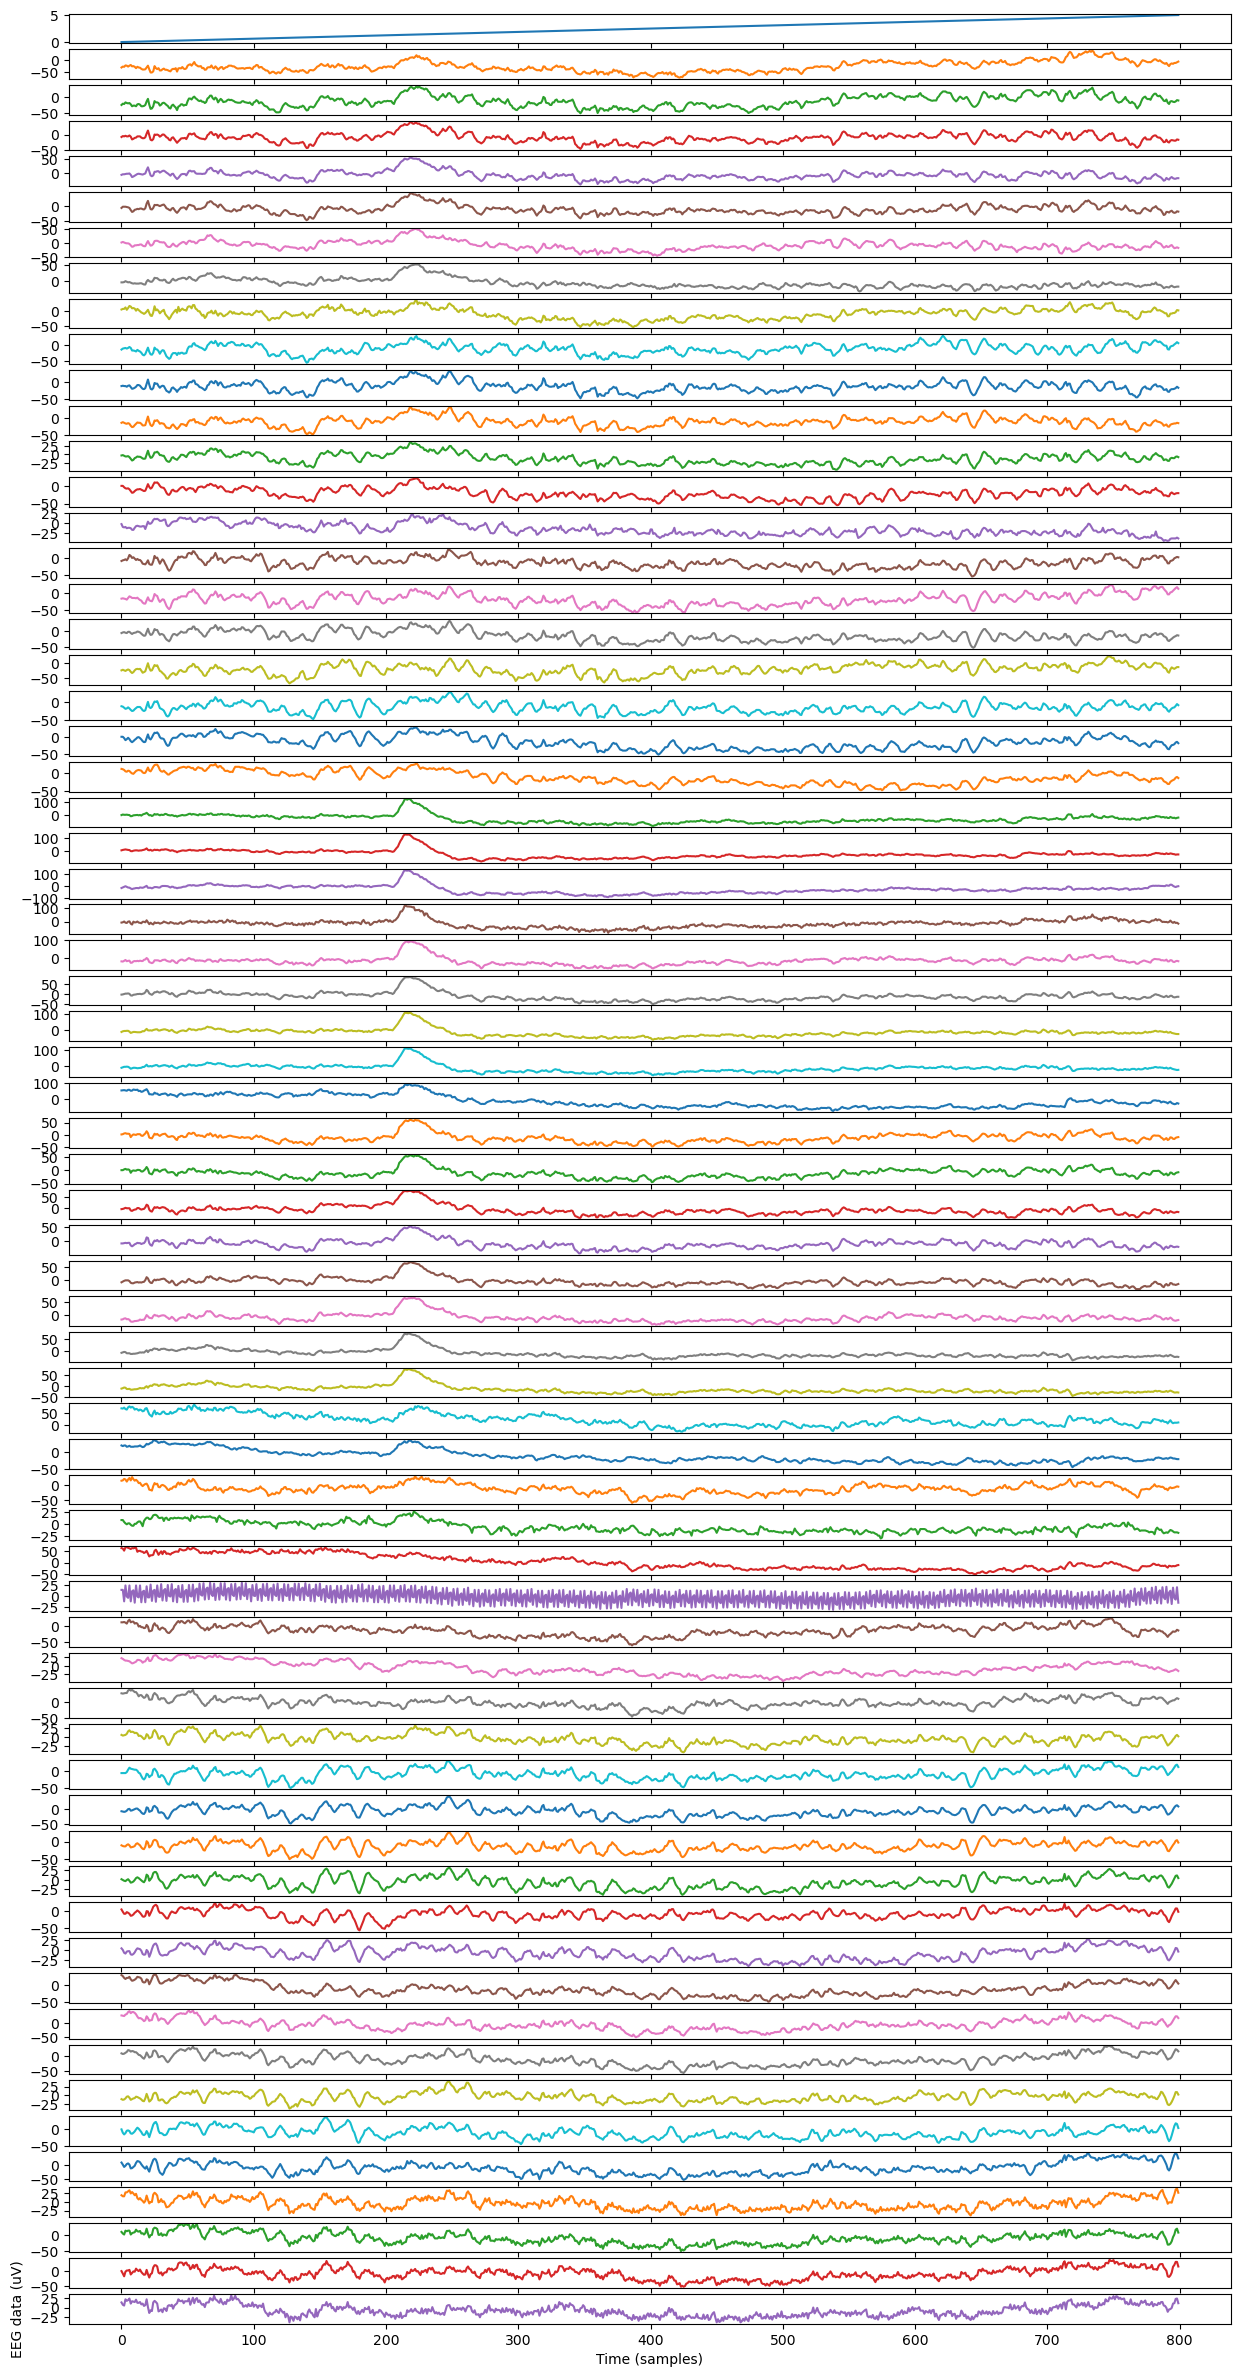

In [6]:
df_first = all_dfs[34][8]

df_first.iloc[:5*160].plot(subplots = True, legend = False, figsize = (15, 30))
plt.xlabel('Time (samples)')
plt.ylabel('EEG data (uV)')
plt.show()

/Users/wilsonbeckman/anaconda3/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 2048 is greater than input length  = 65, using nperseg = 65
  warnings.warn('nperseg = {0:d} is greater than input length '


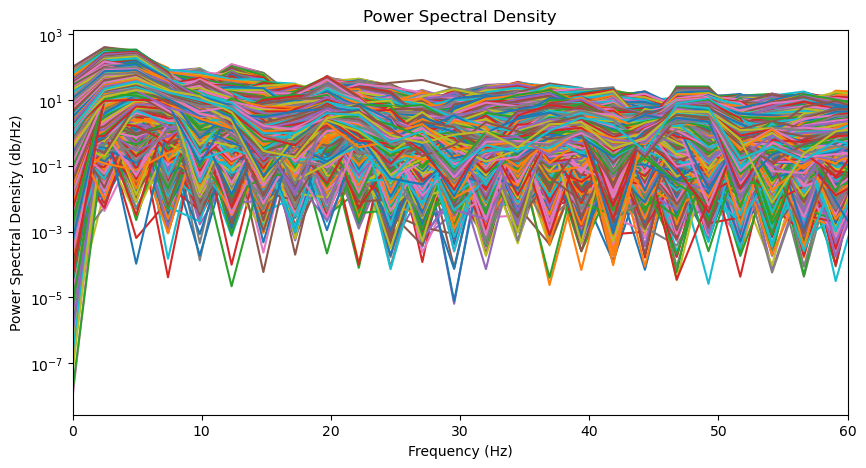

In [7]:
from scipy.signal import welch

freqs, psd = welch(df_first, fs = 160, nperseg = 2048)

plt.figure(figsize = (10, 5))
plt.semilogy(freqs, psd.T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (db/Hz)')
plt.title('Power Spectral Density')
plt.xlim([0, 60])
plt.show()

Used Annotations descriptions: ['T0', 'T1', 'T2']


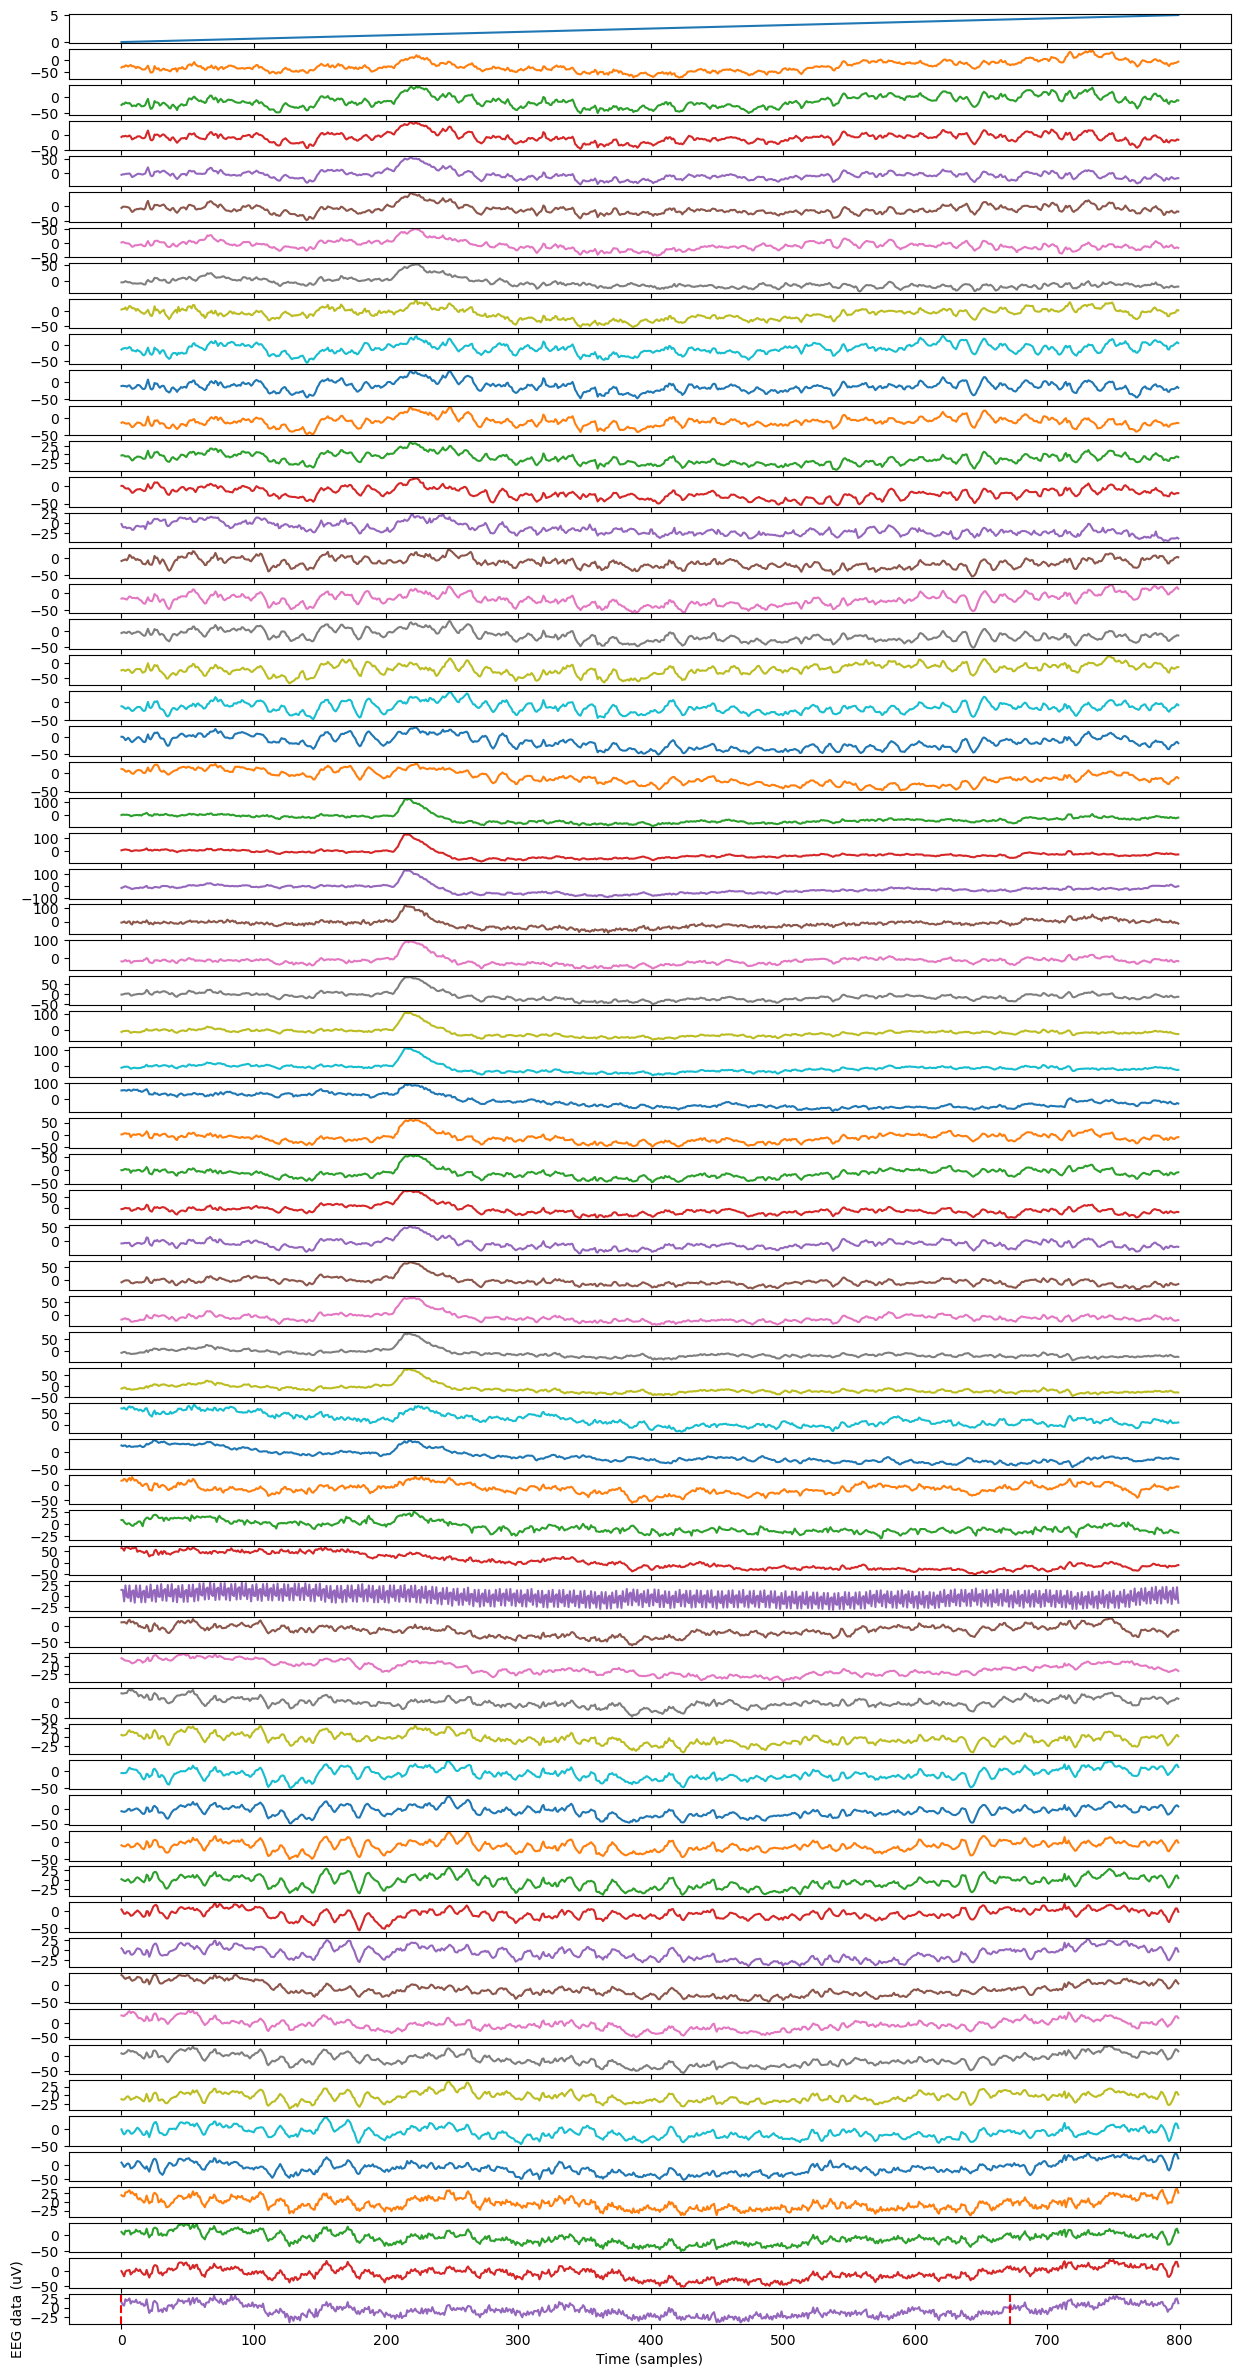

In [8]:
# Extract raw data for subject S001 and run R01
raw_first = all_data[34][8]

# Extract events from the annotations
events = mne.events_from_annotations(raw_first)[0]
event_times = events[:, 0] / raw_first.info['sfreq']

# Plot the events on top of the EEG data
df_first.iloc[:5*160].plot(subplots=True, legend=False, figsize=(15, 30))
for time in event_times:
    if time < 5:  # Only plotting for the first 5 seconds as in the EEG plot above
        plt.axvline(x=time * 160, color='r', linestyle='--')
plt.xlabel('Time (samples)')
plt.ylabel('EEG data (uV)')
plt.show()

In [9]:
events

array([[    0,     0,     1],
       [  672,     0,     2],
       [ 1328,     0,     1],
       [ 1984,     0,     3],
       [ 2640,     0,     1],
       [ 3296,     0,     2],
       [ 3952,     0,     1],
       [ 4608,     0,     3],
       [ 5264,     0,     1],
       [ 5920,     0,     2],
       [ 6576,     0,     1],
       [ 7232,     0,     3],
       [ 7888,     0,     1],
       [ 8544,     0,     2],
       [ 9200,     0,     1],
       [ 9856,     0,     3],
       [10512,     0,     1],
       [11168,     0,     3],
       [11824,     0,     1],
       [12480,     0,     2],
       [13136,     0,     1],
       [13792,     0,     2],
       [14448,     0,     1],
       [15104,     0,     3],
       [15760,     0,     1],
       [16416,     0,     2],
       [17072,     0,     1],
       [17728,     0,     3],
       [18384,     0,     1],
       [19040,     0,     3]])

In [10]:
all_dfs[1][1]

time  Fc5.  Fc3.  Fc1.  Fcz.  Fc2.  Fc4.  Fc6.  C5..  C3..  ...  \
0      0.00000 -16.0 -29.0   2.0  22.0 -12.0 -23.0 -46.0 -36.0 -26.0  ...   
1      0.00625 -56.0 -54.0 -27.0  -4.0 -31.0 -36.0 -56.0 -75.0 -55.0  ...   
2      0.01250 -55.0 -55.0 -29.0  -5.0 -29.0 -34.0 -52.0 -53.0 -42.0  ...   
3      0.01875 -50.0 -44.0 -13.0  13.0 -16.0 -25.0 -45.0 -44.0 -21.0  ...   
4      0.02500 -36.0 -28.0  13.0  42.0   9.0 -10.0 -46.0 -34.0 -12.0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
9755  60.96875   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
9756  60.97500   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
9757  60.98125   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
9758  60.98750   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
9759  60.99375   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

      P8..  Po7.  Po3.  Poz.  Po4.  Po8.  O1..  Oz..  O2..  Iz..  
0    -30.0 -56.0 -52.0 -35.0 -22.0 -33.0 -53.0 -21.0 -11.0  15.0  
1    -20.0 -35.0 -29.0 -18.0  -3.0  -9.0 -53.0 -12.0   1.0  21.0  
2    -20.0 -23.0 -12.0  -6.0   4.0  -7.0 -45.0   2.0  18.0  35.0  
3    -16.0 -12.0   4.0  14.0  20.0   7.0 -29.0  16.0  35.0  47.0  
4     -9.0  -7.0   6.0  20.0  24.0   6.0 -13.0  29.0  40.0  50.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
9755   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
9756   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
9757   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
9758   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
9759   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[9760 rows x 65 columns]

In [11]:
all_data[1][1]

<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MB, data loaded>

# Labeling the Data

Based on PhysioNet.com the labels mean different actions based on the trial run. T0 is always rest but T1 and T2 always mean something different:

In summary, the experimental runs were:

Baseline, eyes open
Baseline, eyes closed
Task 1 (open and close left or right fist)
Task 2 (imagine opening and closing left or right fist)
Task 3 (open and close both fists or both feet)
Task 4 (imagine opening and closing both fists or both feet)
Task 1
Task 2
Task 3
Task 4
Task 1
Task 2
Task 3
Task 4
The data are provided here in EDF+ format (containing 64 EEG signals, each sampled at 160 samples per second, and an annotation channel). For use with PhysioToolkit software, rdedfann generated a separate PhysioBank-compatible annotation file (with the suffix .event) for each recording. The .event files and the annotation channels in the corresponding .edf files contain identical data.

Each annotation includes one of three codes (T0, T1, or T2):

T0 corresponds to rest
T1 corresponds to onset of motion (real or imagined) of
the left fist (in runs 3, 4, 7, 8, 11, and 12)
both fists (in runs 5, 6, 9, 10, 13, and 14)
T2 corresponds to onset of motion (real or imagined) of
the right fist (in runs 3, 4, 7, 8, 11, and 12)
both feet (in runs 5, 6, 9, 10, 13, and 14)

In [150]:
# Label mapping
task_labels = {
    "T0": 0,  # Rest
    "T1": {  # Left Fist (based on run number)
        (3, 4, 7, 8, 11, 12): 1,  # Real Movement
        (5, 6, 9, 10, 13, 14): 3  # Imagined Movement
    },
    "T2": {  # Right Fist or Both Feet (based on run number)
        (3, 4, 7, 8, 11, 12): 2,  # Real Movement: Right Fist
        (5, 6, 9, 10, 13, 14): 4  # Real Movement: Both Feet
    }
}

for subject, runs in all_dfs.items():
    for run, df in runs.items():
        # Set a default label
        df['label'] = 0

        # Retrieve the corresponding events using mne.events_from_annotations
        raw_data = all_data[subject][run]
        events = mne.events_from_annotations(raw_data)[0]

        # Iterate over the events and label the dataframe
        for event_time_sample, _, event_id in events:
            label = task_labels.get(event_id, event_id)  # Use event_id directly if not in task_labels
            df.loc[event_time_sample:, 'label'] = label


KeyError: 1

In [13]:
def get_ml_label(run, label):
    if label ==1:
        return 0
    if run in [3, 7, 11]:
        if label == 2:
            return 1
        if label == 3:
            return 2
    elif run in [4, 8, 12]:
        if label == 2:
            return 5
        if label == 3:
            return 6
    elif run in [5, 9, 13]:
        if label == 2:
            return 3
        if label == 3:
            return 4
    elif run in [6, 10, 14]:
        if label == 2:
            return 7
        if label == 3:
            return 8
    return None

In [14]:
for subject, runs in all_dfs.items():
    for run_number, df in enumerate(runs.values(), start = 1):
        df['ml_label'] = df['label'].apply(lambda x: get_ml_label(run_number, x))

In [15]:
for subject, runs in all_dfs.items():
    for run_number, df in runs.items():
        if 'label' in df.columns:
            df.drop(columns = ['label'], inplace = True)
            all_dfs[subject][run_number] = df

# Graphing a Couple Random Signals From Ransom Subjects

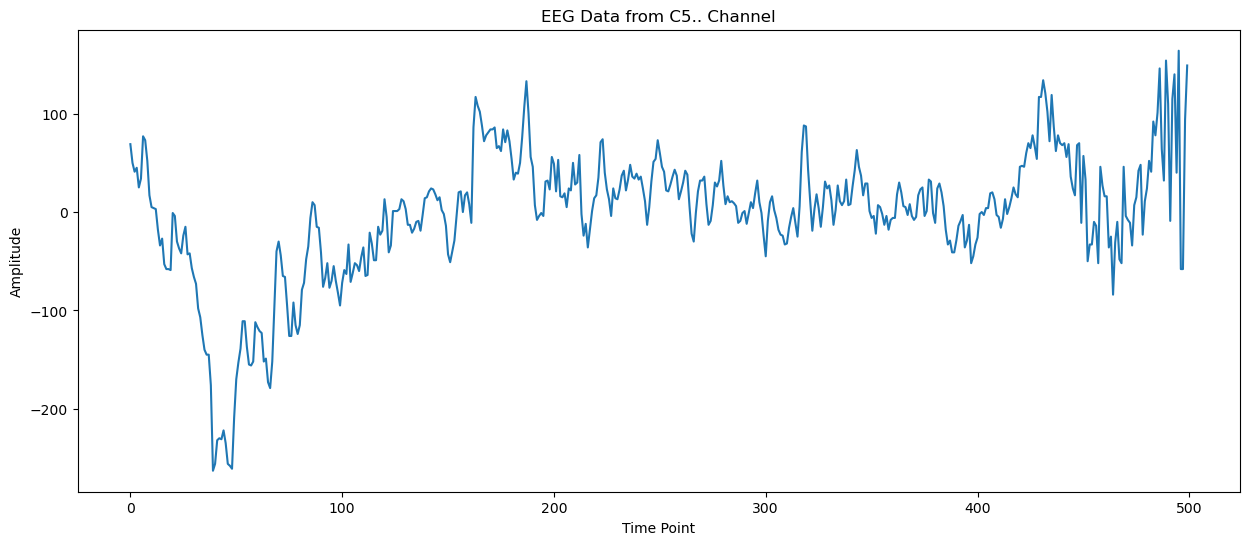

In [16]:
df = all_dfs[23][5]

df['C5..'].iloc[:500].plot(figsize = (15, 6))
plt.title('EEG Data from C5.. Channel')
plt.ylabel('Amplitude')
plt.xlabel('Time Point')
plt.show()

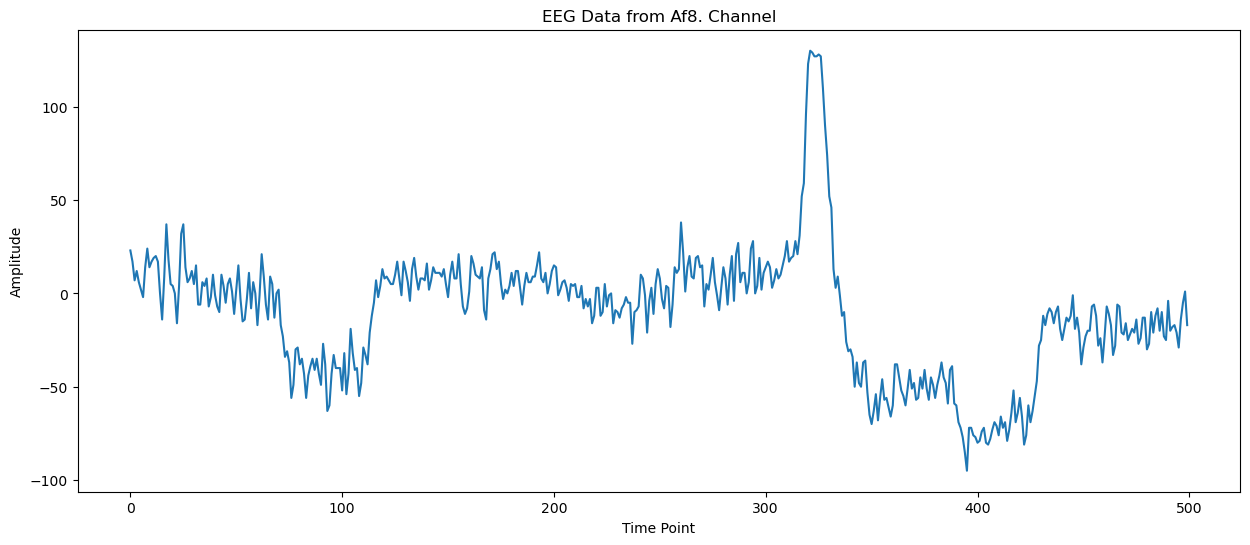

In [17]:
df = all_dfs[89][5]

df['Af8.'].iloc[:500].plot(figsize = (15, 6))
plt.title('EEG Data from Af8. Channel')
plt.ylabel('Amplitude')
plt.xlabel('Time Point')
plt.show()

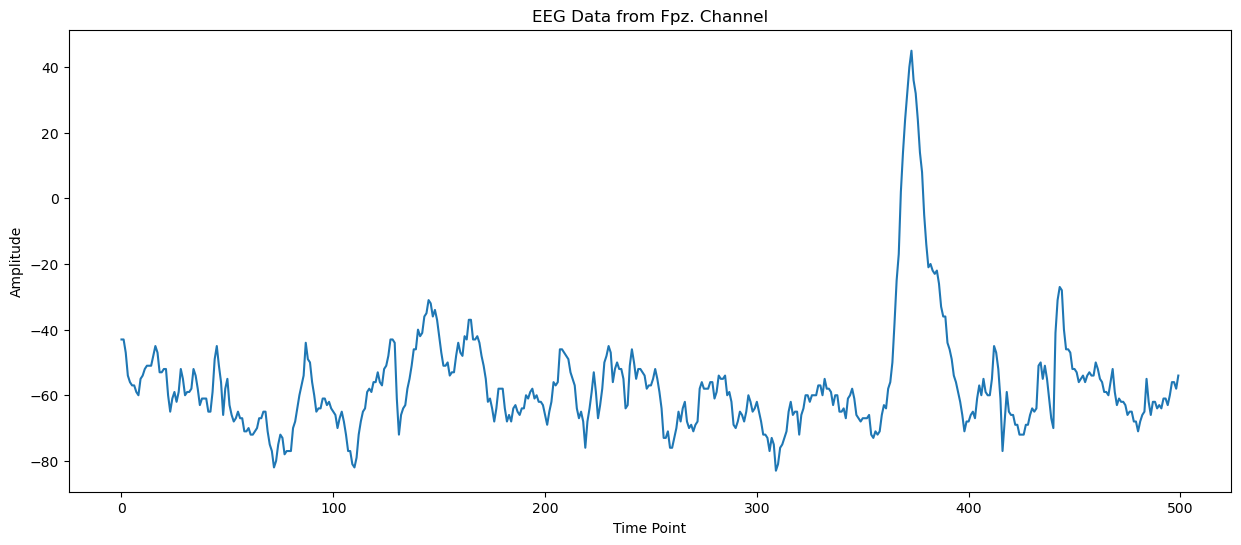

In [18]:
df = all_dfs[34][5]

df['Fpz.'].iloc[:500].plot(figsize = (15, 6))
plt.title('EEG Data from Fpz. Channel')
plt.ylabel('Amplitude')
plt.xlabel('Time Point')
plt.show()

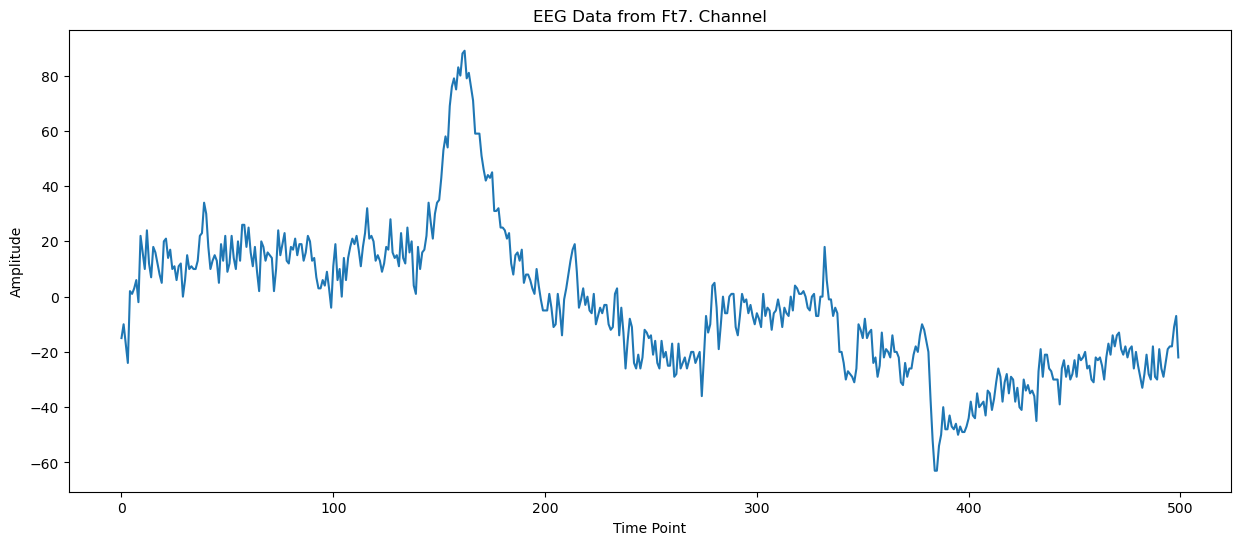

In [19]:
df = all_dfs[20][11]

df['Ft7.'].iloc[:500].plot(figsize = (15, 6))
plt.title('EEG Data from Ft7. Channel')
plt.ylabel('Amplitude')
plt.xlabel('Time Point')
plt.show()

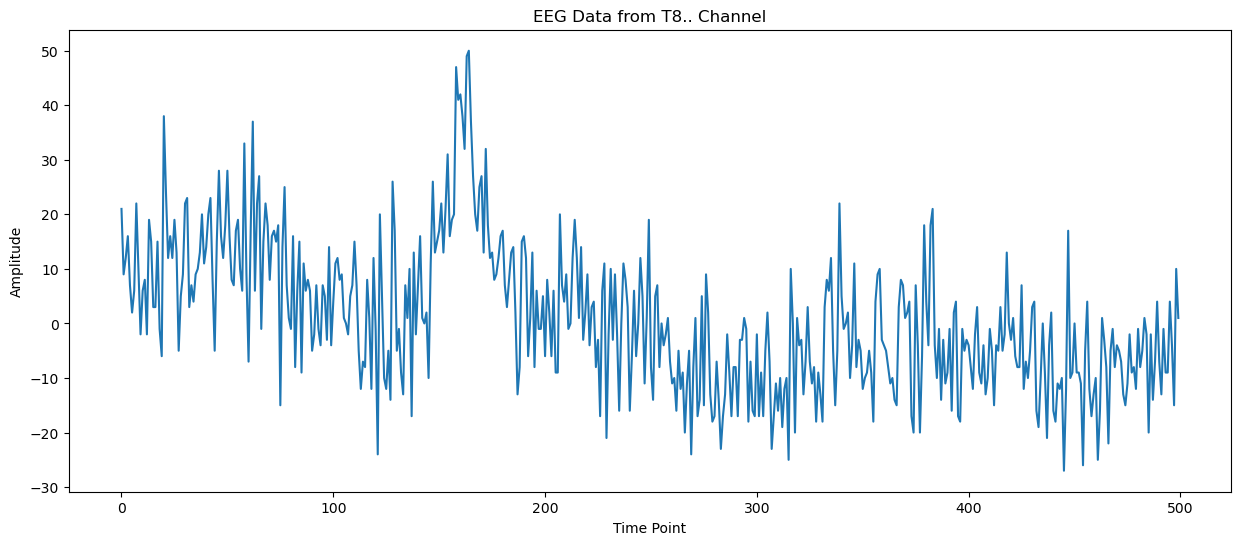

In [20]:
df = all_dfs[20][11]

df['T8..'].iloc[:500].plot(figsize = (15, 6))
plt.title('EEG Data from T8.. Channel')
plt.ylabel('Amplitude')
plt.xlabel('Time Point')
plt.show()

In [21]:
training_examples = []

#Iterate over each subject
for subject_key in all_dfs:
    subject_data = all_dfs[subject_key]
    
    # Interate over each experimental run for the subject
    for run_key in subject_data:
        df = subject_data[run_key]
        
        start_idx = 0
        current_label = df.iloc[0]['ml_label']
        
        #Iterate through rows to detect label changes
        for idx, row in df.iterrows():
            if row['ml_label'] != current_label:
                segment = df.iloc[start_idx:idx]
                training_examples.append(segment)
                
                start_idx = idx
                current_label = row['ml_label']
                
        # Append the last segment
        segment = df.iloc[start_idx:]
        training_examples.append(segment)

# Cleaning the Data For Model Training

There are a lot of messy training examples so we'll want to:

1. Delete the outliers
2. Even out the labels
3. Erase Unlabeled data
4. Cut the data after 0.25 seconds

In [149]:
label_counts = {}

for segment in training_examples:
    # Assuming that each segment has a consistent label
    label = segment.iloc[0]['ml_label']
    
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

print(label_counts)

NameError: name 'training_examples' is not defined

In [23]:
label_counts = {}

for segment in training_examples:
    label = segment.iloc[0]['ml_label']
    
    if pd.isna(label):
        continue
        
    if label in label_counts:
        label_counts[label] += 1
        
    else:
        label_counts[label] = 1
        
print(label_counts)

{0.0: 19893, 2.0: 2456, 1.0: 2471, 6.0: 2438, 5.0: 2480, 4.0: 2469, 3.0: 2440, 8.0: 2455, 7.0: 2465}


In [24]:
training_examples = [segment for segment in training_examples if not pd.isna(segment.iloc[0]['ml_label'])]

In [25]:
len(training_examples)

39567

In [26]:
lengths = [len(segment) for segment in training_examples]

for i, length in enumerate(lengths):
    print(f"Segment {i}: {length} rows")

Segment 0: 9760 rows
Segment 1: 9760 rows
Segment 2: 672 rows
Segment 3: 656 rows
Segment 4: 672 rows
Segment 5: 656 rows
Segment 6: 672 rows
Segment 7: 656 rows
Segment 8: 672 rows
Segment 9: 656 rows
Segment 10: 672 rows
Segment 11: 656 rows
Segment 12: 672 rows
Segment 13: 656 rows
Segment 14: 672 rows
Segment 15: 656 rows
Segment 16: 672 rows
Segment 17: 656 rows
Segment 18: 672 rows
Segment 19: 656 rows
Segment 20: 672 rows
Segment 21: 656 rows
Segment 22: 672 rows
Segment 23: 656 rows
Segment 24: 672 rows
Segment 25: 656 rows
Segment 26: 672 rows
Segment 27: 656 rows
Segment 28: 672 rows
Segment 29: 656 rows
Segment 30: 672 rows
Segment 31: 736 rows
Segment 32: 672 rows
Segment 33: 656 rows
Segment 34: 672 rows
Segment 35: 656 rows
Segment 36: 672 rows
Segment 37: 656 rows
Segment 38: 672 rows
Segment 39: 656 rows
Segment 40: 672 rows
Segment 41: 656 rows
Segment 42: 672 rows
Segment 43: 656 rows
Segment 44: 672 rows
Segment 45: 656 rows
Segment 46: 672 rows
Segment 47: 656 rows


In [27]:
mean_length = sum(lengths) / len(lengths)
min_length = min(lengths)
max_length = max(lengths)

print(f"Average Length of the Dataframe: {mean_length}")
print(f"Minimum Length of the Dataframe: {min_length}")
print(f"Maximum Length of the Dataframe: {max_length}")

Average Length of the Dataframe: 702.4512346147042
Minimum Length of the Dataframe: 16
Maximum Length of the Dataframe: 9760


In [28]:
for idx, df in enumerate(training_examples):
    if len(df) == 16:
        print(f"Dataframe at index {idx} has only 16 rows:\n")
        print(df)

Dataframe at index 31952 has only 16 rows:

       time  Fc5.  Fc3.  Fc1.  Fcz.  Fc2.  Fc4.  Fc6.  C5..  C3..  ...  Po7.  \
0   0.00000  -2.0   2.0  -4.0 -12.0  -4.0  -1.0  -4.0   3.0   3.0  ...   7.0   
1   0.00625   4.0   3.0  -3.0 -13.0  -5.0  -4.0  -4.0   3.0   3.0  ...   6.0   
2   0.01250   9.0   7.0  -2.0 -13.0  -5.0  -5.0  -7.0   6.0   4.0  ...   7.0   
3   0.01875   2.0   3.0  -4.0 -13.0  -5.0  -5.0 -11.0   4.0   4.0  ...   9.0   
4   0.02500   5.0   4.0  -2.0  -9.0  -2.0  -2.0  -6.0   6.0   6.0  ...  11.0   
5   0.03125   8.0   7.0   0.0  -8.0  -2.0  -1.0  -5.0  11.0  10.0  ...  19.0   
6   0.03750   7.0   7.0   0.0 -10.0  -2.0   0.0  -2.0   9.0   9.0  ...  20.0   
7   0.04375   9.0   7.0  -1.0 -12.0  -3.0  -1.0  -3.0  10.0   8.0  ...  18.0   
8   0.05000  15.0  10.0   1.0 -11.0  -2.0  -1.0  -4.0  12.0   8.0  ...  16.0   
9   0.05625   0.0   2.0  -3.0 -14.0  -4.0  -2.0  -3.0   7.0   4.0  ...  24.0   
10  0.06250   4.0   5.0   0.0 -13.0  -5.0  -3.0  -4.0  13.0   8.0  ...  17.0

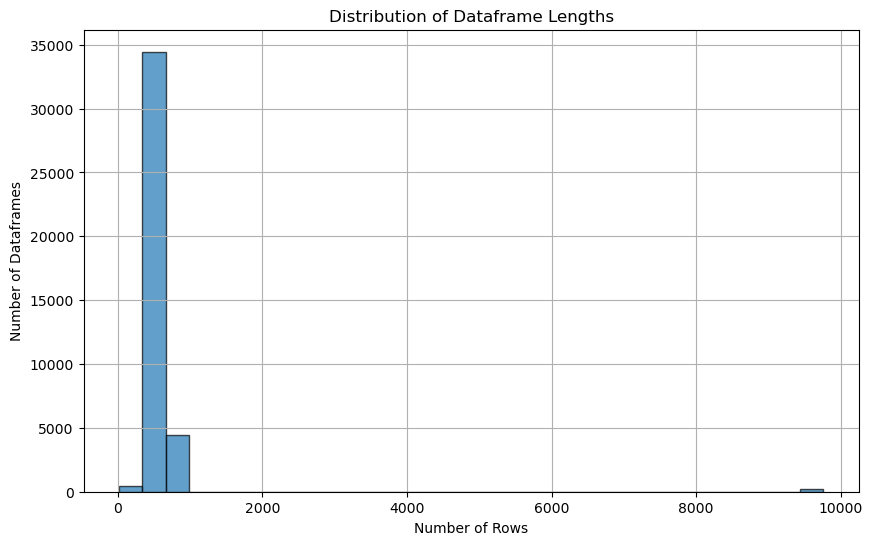

In [29]:
# Create a list of lengths
df_lengths = [len(df) for df in training_examples]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_lengths, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Dataframe Lengths')
plt.xlabel('Number of Rows')
plt.ylabel('Number of Dataframes')
plt.grid(True)
plt.show()

In [30]:
# Filter dataframes based on their length
filtered_training_examples = [df for df in training_examples if 600 <= len(df) <= 700]

# Update training_examples with the filtered list
training_examples = filtered_training_examples

In [31]:
len(training_examples)

38562

In [32]:
label_counts = {}

for segment in training_examples:
    label = segment.iloc[0]['ml_label']
    
    if pd.isna(label):
        continue
        
    if label in label_counts:
        label_counts[label] += 1
        
    else:
        label_counts[label] = 1
        
print(label_counts)

{0.0: 19219, 2.0: 2422, 1.0: 2426, 6.0: 2403, 5.0: 2425, 4.0: 2427, 3.0: 2405, 8.0: 2406, 7.0: 2429}


In [33]:
lengths = [len(segment) for segment in training_examples]

mean_length = sum(lengths) / len(lengths)
min_length = min(lengths)
max_length = max(lengths)

print(f"Average Length of the Dataframe: {mean_length}")
print(f"Minimum Length of the Dataframe: {min_length}")
print(f"Maximum Length of the Dataframe: {max_length}")

Average Length of the Dataframe: 657.6497069654064
Minimum Length of the Dataframe: 608
Maximum Length of the Dataframe: 688


In [148]:
# Need to create an even number of examples across all Labels

import random

#separate the dataframes with label 0.0
zero_label_dfs = [df for df in training_examples if df['ml_label'].iloc[0] == 0.0]
other_label_dfs = [df for df in training_examples if df['ml_label'].iloc[0] != 0.0]

# Randomly sample 2400 dataframes from zero_label_dfs
sampled_zero_label_dfs = random.sample(zero_label_dfs, 2400)

#Combine the sampled dataframes with the other_label_dfs
balanced_training_examples = sampled_zero_label_dfs + other_label_dfs

#Shuffle the combined datasets
random.shuffle(balanced_training_examples)

# Update training_examples with balanced list
training_examples = balanced_training_examples

NameError: name 'training_examples' is not defined

In [35]:
label_counts = {}

for segment in training_examples:
    label = segment.iloc[0]['ml_label']
    
    if pd.isna(label):
        continue
        
    if label in label_counts:
        label_counts[label] += 1
        
    else:
        label_counts[label] = 1
        
print(label_counts)

{5.0: 2425, 1.0: 2426, 0.0: 2400, 6.0: 2403, 8.0: 2406, 4.0: 2427, 7.0: 2429, 2.0: 2422, 3.0: 2405}


In [36]:
lengths = [len(segment) for segment in training_examples]

mean_length = sum(lengths) / len(lengths)
min_length = min(lengths)
max_length = max(lengths)

print(f"Average Length of the Dataframe: {mean_length}")
print(f"Minimum Length of the Dataframe: {min_length}")
print(f"Maximum Length of the Dataframe: {max_length}")

Average Length of the Dataframe: 656.3209768661178
Minimum Length of the Dataframe: 640
Maximum Length of the Dataframe: 688


In [41]:
desired_labels = [1.0, 2.0, 3.0, 4.0]

filtered_training_examples = [df for df in training_examples if df['ml_label'].iloc[0] in desired_labels]

In [42]:
#Based on the paper, they sampled the data 0.25 seconds after the start of segment and sampled 320 timestamps

trimmed_training_examples = [df.iloc[40:360] for df in filtered_training_examples]

In [49]:
del zero_label_dfs
del training_examples
del other_label_dfs
del lengths
del filtered_training_examples
del df_lengths
del balanced_training_examples

In [51]:
all_data = pd.concat([df.drop(columns = ['ml_label', 'time']) for df in trimmed_training_examples], axis = 0)

global_mean = all_data.mean()
global_std = all_data.std()

def normalize_df(df, mean, std):
    normalized_df = df.copy()
    for column in df.columns:
        if column not in ['ml_label', 'time']:
            normalized_df[column] = (df[column] - mean[column]) / std[column]
    return normalized_df

normalized_dfs = [normalize_df(df, global_mean, global_std) for df in trimmed_training_examples]

In [62]:
X = [df.iloc[:, 1:-1].values for df in normalized_dfs]
y = [df.iloc[0, -1] for df in normalized_dfs]

In [63]:
print("Shape of training example in X: ", X[1].shape)
print("Shape of label in y: ", y[1].shape)

Shape of training example in X:  (320, 64)
Shape of label in y:  ()


In [64]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [79]:
# Labels need to start with 0 and end with 3
y_train = [label-1 for label in y_train]
y_val = [label-1 for label in y_val]
y_test = [label-1 for label in y_test]

In [80]:
print("X_train shape:", len(X_train), X_train[0].shape)
print("y_train shape:", len(y_train))

print("X_val shape:", len(X_val), X_val[0].shape)
print("y_val shape:", len(y_val))

print("X_test shape:", len(X_test), X_test[0].shape)
print("y_test shape:", len(y_test))

X_train shape: 7744 (320, 64)
y_train shape: 7744
X_val shape: 968 (320, 64)
y_val shape: 968
X_test shape: 968 (320, 64)
y_test shape: 968


In [81]:
class EEGDataset(Dataset):
    def __init__(self, data, labels):
        self.data = [torch.tensor(d, dtype=torch.float32) for d in data]
        self.labels = [torch.tensor(l, dtype=torch.long) for l in labels]
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        return self.data[index], self.labels[index]

In [82]:
# Convert data to PyTorch datasets
train_datasets = EEGDataset(X_train, y_train)
val_datasets = EEGDataset(X_val, y_val)
test_datasets = EEGDataset(X_test, y_test)

#Can experiment with Batch Size. I started with 32 but the paper used 256
batch_size = 256
train_loader = DataLoader(train_datasets, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_datasets, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_datasets, batch_size=batch_size, shuffle=False)

In [83]:
# Extract the first batch of data to determine the shape
first_batch = next(iter(train_loader))
sample_data, _ = first_batch

# Building and Training the Model

In [131]:
class ResBlock(nn.Module):
    def __init__(self, Ni, No, K):
        super(ResBlock, self).__init__()
        self.bn1 = nn.BatchNorm1d(Ni)
        self.elu1 = nn.ELU()
        self.conv1 = nn.Conv1d(Ni, No, K, padding = K//2)
        
        self.bn2 = nn.BatchNorm1d(No)
        self.elu2 = nn.ELU()
        self.conv2 = nn.Conv1d(No, No, K, padding = K//2)
        
        if Ni != No:
            self.shortcut = nn.Conv1d(Ni, No, 1)
        else:
            self.shortcut = nn.Identity()
        
    def forward(self, x):
        out = self.conv1(self.elu1(self.bn1(x)))
        out = self.conv2(self.elu2(self.bn2(out)))
        return out + self.shortcut(x)
        

class EncoderG(nn.Module):
    def __init__(self):
        super(EncoderG, self).__init__()
        self.conv = nn.Conv1d(64, 32, 13, padding=13//2)
        self.res1 = ResBlock(32, 32, 11)
        self.pool1 = nn.MaxPool1d(4)
        self.res2 = ResBlock(32, 64, 9)
        self.pool2 = nn.MaxPool1d(4)
        self.res3 = ResBlock(64, 128, 7)
        self.elu = nn.ELU()
    
    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.conv(x)
        x = self.res1(x)
        x = self.pool1(x)
        x = self.res2(x)
        x = self.pool2(x)
        x = self.res3(x)
        x = self.elu(x)
        return x.view(x.size(0), -1)

class ModelF(nn.Module):
    def __init__(self):
        super(ModelF, self).__init__()
        self.fc1 = nn.Linear(2560, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 4)
    
    def forward(self, x):
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = nn.ReLU()(self.fc3(x))
        x = self.fc4(x)
        return x
    
apple_model = nn.Sequential(
    EncoderG(), 
    ModelF()
)

In [132]:
# Weight initialization using Xavier (Glorot) initialization
def initialize_weights(model):
    for m in apple_model.modules():
        if isinstance(m, (nn.Conv1d, nn.Linear)):
            nn.init.xavier_uniform_(m.weight)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)

# Initializing weights
initialize_weights(apple_model)

In [133]:
criterion = nn.CrossEntropyLoss()

# I'm assuming apple_model as the name of your model
optimizer = optim.Adam(apple_model.parameters(), lr=0.003)

In [134]:
num_epochs = 25

# Lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    apple_model.train()  # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = apple_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)
    
    # Validation phase
    apple_model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = apple_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch [{epoch + 1}/{num_epochs}]")
    print(f"Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_accuracies[-1]:.2f}%")
    print(f"Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracies[-1]:.2f}%")
    print("---------------------------------------------------------")

print('Finished Training')

Epoch [1/25]
Training Loss: 1.3918, Training Accuracy: 38.61%
Validation Loss: 1.2305, Validation Accuracy: 45.25%
---------------------------------------------------------
Epoch [2/25]
Training Loss: 1.1718, Training Accuracy: 49.50%
Validation Loss: 1.1523, Validation Accuracy: 50.72%
---------------------------------------------------------
Epoch [3/25]
Training Loss: 1.0936, Training Accuracy: 53.31%
Validation Loss: 1.1518, Validation Accuracy: 50.52%
---------------------------------------------------------
Epoch [4/25]
Training Loss: 1.0766, Training Accuracy: 54.52%
Validation Loss: 1.1564, Validation Accuracy: 50.10%
---------------------------------------------------------
Epoch [5/25]
Training Loss: 1.0381, Training Accuracy: 56.42%
Validation Loss: 1.1145, Validation Accuracy: 53.82%
---------------------------------------------------------
Epoch [6/25]
Training Loss: 0.9998, Training Accuracy: 57.76%
Validation Loss: 1.1116, Validation Accuracy: 55.68%
--------------------

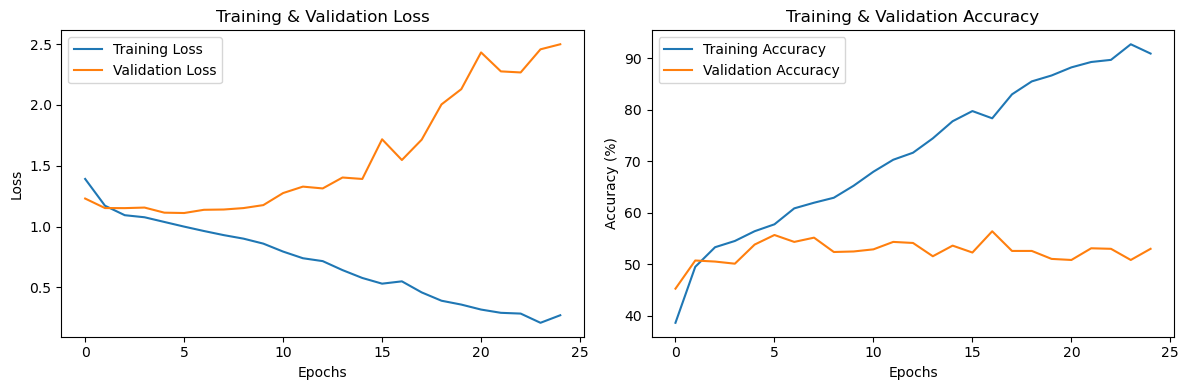

In [135]:
# Plotting Training and Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

The appropriate model with the smallest Validation loss and best Validation accuracy relative to training accuracy is the model trained at the 6th epoch

# Other Considerations from the Paper

There are a few other things we could try to optimize this model. One of them is experimenting with a smaller or deeper model. We could also adjust the hyperparameter like loss function, batch size or learning rate. There are a number of ways the authors augmented the data before training like:

1. signal mixing which would mix similar signals together
2. Noise Addition which would slightly modify the signals at each timestamp
3. ramdom temporal delay which would randomly sample 320 consecutive timestamps from the example at different spots
4. Temporal cutout which would cut a chunk of data from a training example

We could have also tried training a binary classification model which would detect whether or not an example was real or imagined.

It wasn't in ther paper but I also considered features like PSD, Rolling Mean and Rolling Variance.